# Project: No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from over 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. It consist of 110527 sample and 14 columns.


__Supporting Material__
- [__No Show Appointment__](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&source=editors&ust=1653562576690512&usg=AOvVaw2Wr7TpvUuLUAvwiXtPR8zy)

#### Data Source
- [__Kaggle__](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1653562576691069&usg=AOvVaw1NcnXiqZwomcljy7DxTZWW)

#### Data Overview
- This inform is provided by the Kaggle under the licence of CC BY-NC-SA 4.0
- Reference to Joni Hoppen and Aquarela Advanced Analytics [__Aquarela__ ](http://bit.ly/2Ulwskh)

|Atribute |Decription |
|:--------- |:-----------|
|PatientId | Identification of a patient |
|AppointmentID  | Identification of each appointment |
|Gender  | Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
|AppointmentDay | The day of the actuall appointment, when they have to visit the doctor. |
|ScheduledDay | The day someone called or registered the appointment, this is before appointment of course. |
|Age | How old is the patient. |
|Neighbourhood | Where the appointment takes place. |
|Scholarship | True of False . indicates whether or not the patient is enrolled in Brasilian welfare program [__Bolsa Família__](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) |
|Hipertension  | True or False |
|Diabetes | True or False |
|Alcoholism | True or False |
|Handcap | True or False |
|SMS_received | 1 or more messages sent to the patient. |
|No-show | True or False |

##### Questions
 1. Do the Number of SMS Received determine whether the Patient Shows up or not?
 2. Is the duration between Scheduled Day and Appointment Day the cause of discouragement?
 3. Do Day of the Week of Appointment also contribute to the factor of not Showing Up
 4. Is there a certain Age Group of Patient that missed their appointment?

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#number of sample and column in dataset
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum().any()

False

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

### Data Cleaning

#### 1. Cleaning Columns Labels
 - Drop extraneous columns
 - Rename and Change columns

#### 2. Converting Data Types
 - Scheduled Day should be datetime not string
 - Appointment Day should be datetime not string
 
#### 3. Drop Row
 - Drop age row with negative number
 
#### 4. Swap Handicap info for SMS Received
 - The decription from the attribute stated that the Handicap should either true or false while the SMS Received described to be the number of times each patient received sms. Therefore, I will interchange them by renaming it.
 
#### 5. Adding Column for Age Group
 - To know the age group of people who miss their appointment

#### 6. Adding Day of the Week Column
 - To check if the day of appointment of the week also contribute to No Show Up of Patient 
 
#### 7. Adding a waited day Column
 - Number of days between Scheduled day to Appointment day.
 - Drop row with negative days because appointment day can't be before scheduled day
 - Then convert timedelta to int.

### Step 1: Cleaning Columns Labels
> Drop Extraneous Columns

In [11]:
#Drop PatientId and AppointmentID columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
df.shape

(110527, 12)

> Rename and Change columns to lowercase for consistences

In [13]:
#Rename ScheduledDay,Appointmentday and No-show Columns
df.rename(columns = {'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show':'No_show'}, inplace=True)
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
#Change Columms to lowercase
df.rename(columns = lambda x: x.lower(), inplace=True)
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
df.shape

(110527, 12)

### Step 2: Converting Data Type
> Scheduled Day and Appointment Day should be datetime not string and also remove the time since it's not relevant

In [16]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], infer_datetime_format=True).dt.normalize()
df['appointment_day'] = pd.to_datetime(df['appointment_day'], infer_datetime_format=True).dt.normalize()

In [17]:
df[['scheduled_day', 'appointment_day']].head(2)

,scheduled_day,appointment_day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29


In [18]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
df.shape

(110527, 12)

### Step 3: Drop Row
> Drop age row with negative number. This might be inputted wrongly when when inputing the data

In [20]:
df[df['age'] < 0]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [21]:
df.drop(df[df['age'] < 0].index, inplace=True)
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [22]:
df.shape

(110526, 12)

### Step 4 : Swap Handicap info for SMS Received
> The decription from the attribute stated that the Handicap should either true or false while the SMS Received described to be the number of times each patient received sms. Therefore, I will interchange them by renaming it.

In [23]:
df.rename(columns={'handicap':'sms_received', 'sms_received':'handicap'}, inplace=True)
df.nunique()

gender               2
scheduled_day      111
appointment_day     27
age                103
neighbourhood       81
scholarship          2
hypertension         2
diabetes             2
alcoholism           2
sms_received         5
handicap             2
no_show              2
dtype: int64

In [24]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [25]:
#Confirming the unique data
df.handicap.unique(), df.sms_received.unique()

(array([0, 1], dtype=int64), array([0, 1, 2, 3, 4], dtype=int64))

In [26]:
df.shape

(110526, 12)

### Step 5: Adding Column for Age Group
> To know the age group of people who miss their appointment

In [27]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
#this bin egdes will be used to cut the data into groups
bin_edges = [-1, 13, 18, 37, 55, 115]

In [29]:
#label for the age group
bin_names = ['Children', 'Teen', 'Youth', 'Young Adult', 'Adult']

In [30]:
# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


In [31]:
df.age_group.unique()

['Adult', 'Children', 'Youth', 'Young Adult', 'Teen']
Categories (5, object): ['Children' < 'Teen' < 'Youth' < 'Young Adult' < 'Adult']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110526 non-null  object        
 1   scheduled_day    110526 non-null  datetime64[ns]
 2   appointment_day  110526 non-null  datetime64[ns]
 3   age              110526 non-null  int64         
 4   neighbourhood    110526 non-null  object        
 5   scholarship      110526 non-null  int64         
 6   hypertension     110526 non-null  int64         
 7   diabetes         110526 non-null  int64         
 8   alcoholism       110526 non-null  int64         
 9   sms_received     110526 non-null  int64         
 10  handicap         110526 non-null  int64         
 11  no_show          110526 non-null  object        
 12  age_group        110526 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(7), object(3)
memory usage: 11.1+

In [33]:
df[df['age_group'] == 'Adult']

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110503,F,2016-06-01,2016-06-01,64,SOLON BORGES,0,0,0,0,0,0,No,Adult
110508,F,2016-06-01,2016-06-01,59,MARIA ORTIZ,0,0,0,0,0,0,No,Adult
110510,F,2016-06-01,2016-06-01,64,SOLON BORGES,0,0,0,0,0,0,No,Adult
110514,F,2016-06-08,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No,Adult


In [34]:
df.shape

(110526, 13)

### Step 6: Adding Day of the Week Column
> To check if the day of appointment of the week also contribute to No Show Up of Patient 

In [35]:
df['days'] = pd.to_datetime(df['appointment_day']).dt.day_name()

In [36]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,Friday


In [37]:
df.days.unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110526 non-null  object        
 1   scheduled_day    110526 non-null  datetime64[ns]
 2   appointment_day  110526 non-null  datetime64[ns]
 3   age              110526 non-null  int64         
 4   neighbourhood    110526 non-null  object        
 5   scholarship      110526 non-null  int64         
 6   hypertension     110526 non-null  int64         
 7   diabetes         110526 non-null  int64         
 8   alcoholism       110526 non-null  int64         
 9   sms_received     110526 non-null  int64         
 10  handicap         110526 non-null  int64         
 11  no_show          110526 non-null  object        
 12  age_group        110526 non-null  category      
 13  days             110526 non-null  object        
dtypes: category(1), date

In [39]:
df.shape

(110526, 14)

### Step 7: Adding a waited day Column
> Number of days between Scheduled day to Appointment day.

In [40]:
waited_day = df.appointment_day - df.scheduled_day
waited_day

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Length: 110526, dtype: timedelta64[ns]

In [41]:
df['waited_day'] = waited_day
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days,waited_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,Friday,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,Friday,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult,Friday,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children,Friday,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,Friday,0 days


In [42]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,waited_day
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10 days 04:24:39.789370826
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15 days 06:07:14.979140739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


In [43]:
df.shape

(110526, 15)

> Drop row with negative days because appointment day can't be before scheduled day

In [44]:
neg_dif = df.query('waited_day < "0 days"')
neg_dif

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days,waited_day
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Young Adult,Monday,-1 days
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Youth,Tuesday,-1 days
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Youth,Wednesday,-1 days
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Adult,Thursday,-6 days
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Children,Tuesday,-1 days


In [45]:
df.drop(neg_dif.index, inplace=True)

In [46]:
df[df['waited_day'] < '0 days']

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days,waited_day


In [47]:
df.shape

(110521, 15)

> Then convert timedelta to int.

In [48]:
df['waited_day'] = df['waited_day'].dt.days

In [49]:
df['waited_day'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

In [50]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days,waited_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,Friday,0


In [51]:
df.shape

(110521, 15)

##### Done Cleaning.
Saving the cleaned data as clean_no_show_data.csv

In [52]:
df.to_csv('clean_no_show_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [53]:
clean_df = pd.read_csv('clean_no_show_data.csv')
clean_df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,no_show,age_group,days,waited_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,Friday,0


In [54]:
clean_df.shape

(110521, 15)

In [55]:
clean_df.dtypes

gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hypertension        int64
diabetes            int64
alcoholism          int64
sms_received        int64
handicap            int64
no_show            object
age_group          object
days               object
waited_day          int64
dtype: object

In [56]:
clean_df['scheduled_day'] = pd.to_datetime(clean_df['scheduled_day'], infer_datetime_format=True).dt.normalize()
clean_df['appointment_day'] = pd.to_datetime(clean_df['appointment_day'], infer_datetime_format=True).dt.normalize()
clean_df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
sms_received                int64
handicap                    int64
no_show                    object
age_group                  object
days                       object
waited_day                  int64
dtype: object

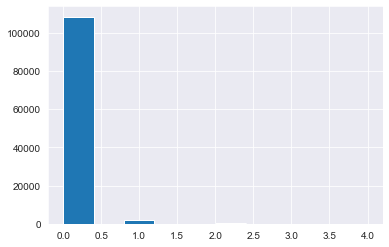

In [57]:
clean_df.sms_received.hist();

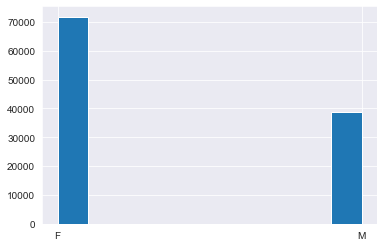

In [58]:
clean_df.gender.hist();

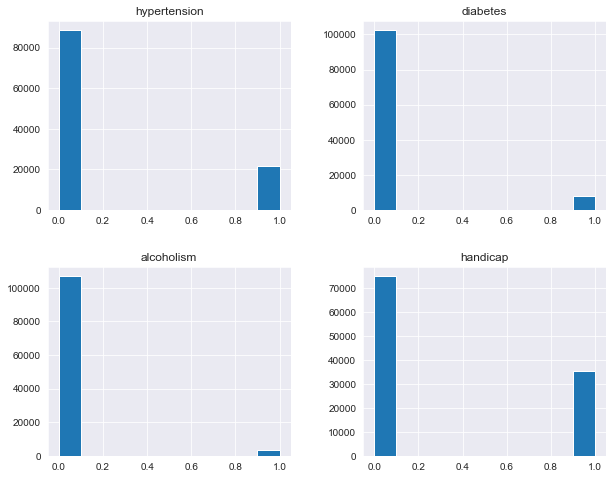

In [59]:
clean_df[['hypertension', 'diabetes', 'alcoholism', 'handicap']].hist(figsize=(10,8));

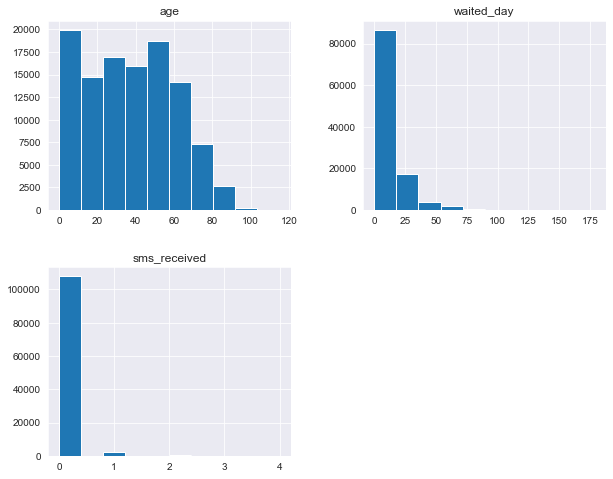

In [60]:
clean_df[['age', 'days', 'waited_day', 'sms_received']].hist(figsize=(10,8));

### Research Question 1
#### Do the Number of SMS Received determine whether the Patient Shows up or not?

In [61]:
# get counts for each show or no show and sms received
sms_received_counts = clean_df.groupby(['sms_received', 'no_show']).count()['appointment_day']
sms_received_counts

sms_received  no_show
0             No         86373
              Yes        21909
1             No          1676
              Yes          364
2             No           146
              Yes           37
3             No            10
              Yes            3
4             No             2
              Yes            1
Name: appointment_day, dtype: int64

In [62]:
# get total counts for each sms received
sms_received_totals = clean_df.groupby('sms_received').count()['appointment_day']
sms_received_totals

sms_received
0    108282
1      2040
2       183
3        13
4         3
Name: appointment_day, dtype: int64

In [63]:
# get proportions by dividing 0 sms received counts by total # of sms received
zero_proportions = sms_received_counts[0] / sms_received_totals[0]
zero_proportions

no_show
No     0.797667
Yes    0.202333
Name: appointment_day, dtype: float64

In [64]:
# get proportions by dividing 1 time sms received counts by total # of sms received
one_proportions = sms_received_counts[1] / sms_received_totals[1]
one_proportions

no_show
No     0.821569
Yes    0.178431
Name: appointment_day, dtype: float64

In [65]:
# get proportions by dividing 2 times sms received counts by total # of sms received
two_proportions = sms_received_counts[2] / sms_received_totals[2]
two_proportions

no_show
No     0.797814
Yes    0.202186
Name: appointment_day, dtype: float64

In [66]:
# get proportions by dividing 3 times sms received counts by total # of sms received
three_proportions = sms_received_counts[3] / sms_received_totals[3]
three_proportions

no_show
No     0.769231
Yes    0.230769
Name: appointment_day, dtype: float64

In [67]:
# get proportions by dividing 4 times sms received counts by total # of sms received
four_proportions = sms_received_counts[4] / sms_received_totals[4]
four_proportions

no_show
No     0.666667
Yes    0.333333
Name: appointment_day, dtype: float64

Set the x coordinate location for each number of time of sms received and and width of each bar.

In [68]:
ind = np.arange(len(zero_proportions))*0.6  # the x locations for the groups
width = 0.10       # the width of the bars
ind

array([0. , 0.6])

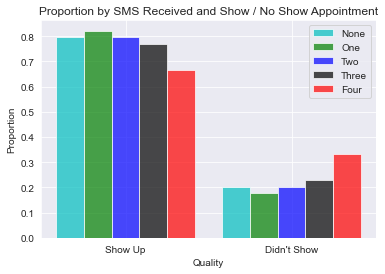

In [69]:
# plot bars
zero_bars = plt.bar(ind, zero_proportions, width, color='c', alpha=.7, label='None')
one_bars = plt.bar(ind + width, one_proportions, width, color='g', alpha=.7, label='One')
two_bars = plt.bar(ind + width + width, two_proportions, width, color='b', alpha=.7, label='Two')
three_bars = plt.bar(ind + width + width + width, three_proportions, width, color='k', alpha=.7, label='Three')
four_bars = plt.bar(ind + width+ width + width + width, four_proportions, width, color='r', alpha=.7, label='Four')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by SMS Received and Show / No Show Appointment')
locations = ind + width * 2  # xtick locations
labels = ['Show Up', "Didn't Show"]  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

It seems the patients were discouraged by the sms they received when it is more than one or none at all.

### Research Question 2
#### Is the duration between Scheduled Day and Appointment Day the cause of discouragement?

In [70]:
clean_df.groupby('no_show').waited_day.mean()

no_show
No      8.754759
Yes    15.835484
Name: waited_day, dtype: float64

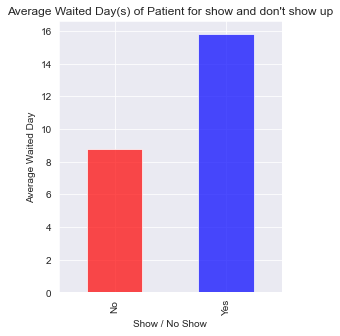

In [71]:
colours = ['red', 'blue']
day_counts = clean_df.groupby('no_show').waited_day.mean()
day_counts.plot(kind='bar', title='Average Waited Day(s) of Patient for show and don\'t show up', color=colours, alpha=.7, figsize=(4,5))
plt.xlabel('Show / No Show')
plt.ylabel('Average Waited Day');

It seem the longer the long duration between scheduled day and appointment day discouraged alot of the patients.

### Research Question 3
#### Do Day of the Week of Appointment also contribute to the factor of not Showing Up?

In [72]:
def bar_chart(grouby_column, percent, titles, xlab, ylab):
    """Code to plot a bar chart by value counts 
    It takes the argument of the following:
    
    1. groupby column = column(s) to groupby whether a column or list of columns e.g 'age', ['no_show', 'age']
    2. percent = whether to normalize by passing True or False
    3. titles = plot title
    4. xlab = xlabel
    5. ylab = ylabel
    colours = ['red', 'blue']"""
    
    day_counts = clean_df.groupby(grouby_column).no_show.value_counts(normalize=percent)
    day_counts.plot(kind='bar', title=titles, color=colours, alpha=.7, figsize=(10,6))
    plt.xlabel(xlab)
    plt.ylabel(ylab);

A function to plot a bar_chart to avoid repeating my code

In [73]:
days_value_count = clean_df.groupby('days').no_show.value_counts()
days_value_count

days       no_show
Friday     No         14982
           Yes         4037
Monday     No         18024
           Yes         4689
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3337
Tuesday    No         20488
           Yes         5150
Wednesday  No         20774
           Yes         5092
Name: no_show, dtype: int64

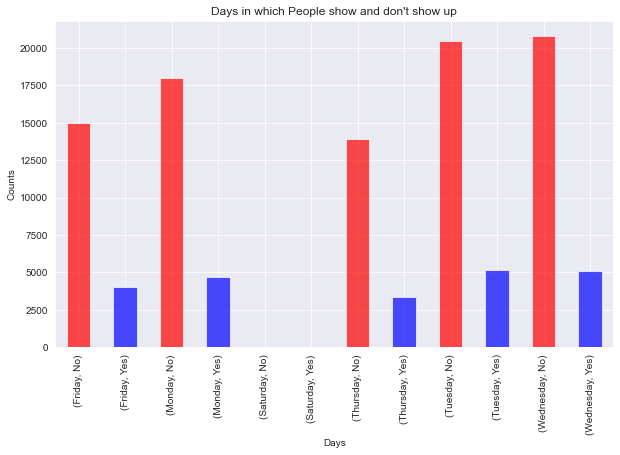

In [74]:
bar_chart('days', False, 'Days in which People show and don\'t show up', 'Days', 'Counts')

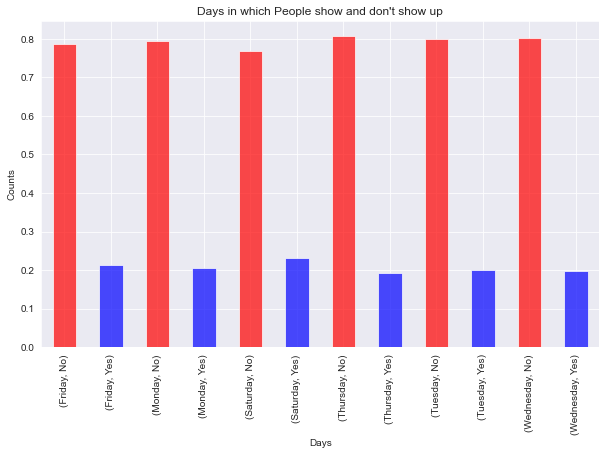

In [75]:
bar_chart('days', True, 'Days in which People show and don\'t show up', 'Days', 'Counts')

This might not be the factor of not showing up for appointment but despite appointment fix for saturday are fews, the percentage of not showing up is high compare to others.

### Research Question 4
####  Is there a certain Age Group of People that missed their appointment?

In [76]:
clean_df.groupby('age_group').no_show.value_counts()

age_group    no_show
Adult        No         23201
             Yes         4302
Children     No         17529
             Yes         4609
Teen         No          4990
             Yes         1737
Young Adult  No         21651
             Yes         5254
Youth        No         20836
             Yes         6412
Name: no_show, dtype: int64

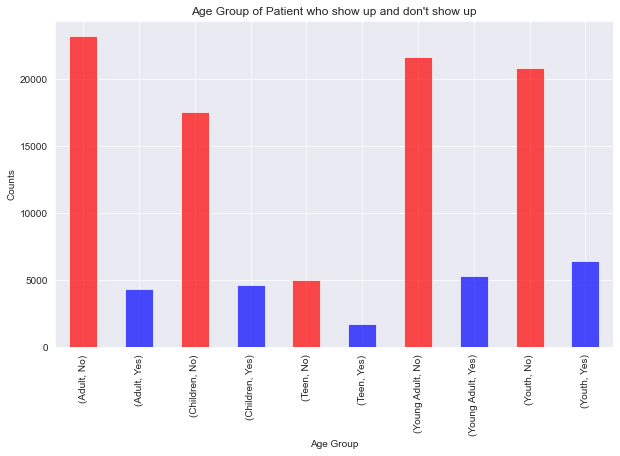

In [77]:
bar_chart('age_group', False, 'Age Group of Patient who show up and don\'t show up', 'Age Group', 'Counts')

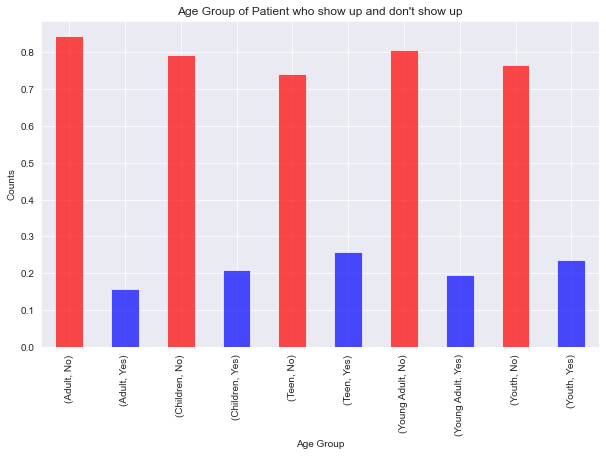

In [78]:
bar_chart('age_group', True, 'Age Group of Patient who show up and don\'t show up', 'Age Group', 'Counts')

The age group also might might be another factor of not showing up. As we can see from the chart above, Teens, Youths and Children have the highest percentage of not showing up for their appointment.

<a id='conclusions'></a>
## Conclusions

> In summary, I would point out the following:
 - As the number of sms sent to patient more than once seems to discouraged for not showing up.
 - The duration between scheduled day and appointment day also seems to contribute to no show up of patients.
 - It turns out that Teens, Youths and Children have the highest rate of not showing up for their appointment.

#### Limitation
This study has some limitations.
 - Despite appointment fix for saturday are fews, the percentage of not showing up is high compare to others.
 - There might be an emergency case also in the data which was not stated or provided i.e whether the case of patients are life-threathening is likely to contribute to not showing up.

This are just based on data analysis and are not done on statistical tests.